# Make spatial plots of basin masks and isopycnal volume change for publication

In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import dask.array as da
import xarray as xr
import string
import os

import cartopy as cart
import cartopy.crs as ccrs



from xmitgcm import open_mdsdataset
import xmitgcm
import sys
sys.path.append('/Users/tatsumonkman/3rd_party_software/ECCOv4-py')
import ecco_v4_py as ecco


from analysis_package import plotting_functions
from analysis_package import open_datasets
from analysis_package import ecco_masks

from importlib import reload

# reload modules for prototyping...
ecco_masks = reload(ecco_masks)
plotting_functions = reload(plotting_functions)
open_datasets = reload(open_datasets)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
from analysis_package import plotting_functions
from analysis_package import open_datasets
from analysis_package import ecco_masks
from analysis_package import integrate_zonally
from analysis_package import lat_fields
from analysis_package import convert_to_sigspace
from analysis_package import calculate_isovol



load_binary_array: loading file /Users/tatsumonkman/3rd_party_software/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
shape after reading 
(13, 90, 90)
load_binary_array: loading file /Users/tatsumonkman/3rd_party_software/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
shape after reading 
(13, 90, 90)
load_binary_array: loading file /Users/tatsumonkman/3rd_party_software/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary

In [4]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import colorspacious



/Users/tatsumonkman/Dropbox/ECCO-Project/ECCOv4r4-analysis


In [6]:
######################################################################################################################
################################################### LOAD GRID ########################################################
######################################################################################################################
grid_path = "./ECCO-GRID.nc"
grid = xr.open_dataset(grid_path)
cds = grid.coords.to_dataset()
grid_xmitgcm = ecco.ecco_utils.get_llc_grid(cds)

######################################################################################################################
############################################# CREATE DOMAIN MASKS ####################################################
######################################################################################################################
maskW = xr.open_dataarray("generic_masks/maskW.nc")
maskS = xr.open_dataarray("generic_masks/maskS.nc")
maskC = xr.open_dataarray("generic_masks/maskC.nc")

southern_ocean_mask_W, southern_ocean_mask_S, southern_ocean_mask_C, so_atl_basin_mask_W, so_atl_basin_mask_S, so_atl_basin_mask_C, so_indpac_basin_mask_W, so_indpac_basin_mask_S, so_indpac_basin_mask_C = ecco_masks.get_basin_masks(maskW, maskS, maskC)

baffin_mask_C = ecco.get_basin_mask("baffin",maskC)
north_mask_C = ecco.get_basin_mask("north",maskC)
hudson_mask_C = ecco.get_basin_mask("hudson",maskC)
gin_mask_C = ecco.get_basin_mask("gin",maskC)
bering_mask_C = ecco.get_basin_mask("bering",maskC)
okhotsk_mask_C = ecco.get_basin_mask("okhotsk",maskC)
atl_mask_C = ecco.get_basin_mask("atl",maskC)

hudson_mask_C = ecco.get_basin_mask("hudson",maskC)
baffin_mask_C = ecco.get_basin_mask("baffin",maskC)

atl_nogin_basin_mask_C = so_atl_basin_mask_C.where(so_atl_basin_mask_C.lat>-32,other=np.nan).where((gin_mask_C+north_mask_C < 1).values,other=np.nan)

atl_nogin_nolab_basin_mask_C = atl_nogin_basin_mask_C.where(atl_nogin_basin_mask_C.lat>-32,other=np.nan).where((hudson_mask_C < 1).values,other=np.nan)

indpac_basin_mask_C = so_indpac_basin_mask_C.where(so_indpac_basin_mask_C.lat>=-32,other=np.nan)
so_basin_mask_C = so_indpac_basin_mask_C.where(so_indpac_basin_mask_C.lat<-32,other=np.nan)



atl_midlat_basin_mask_C = so_atl_basin_mask_C.where(so_atl_basin_mask_C.lat<=50,other=np.nan).where(so_atl_basin_mask_C.lat>=-32,other=np.nan)




load_binary_array: loading file /Users/tatsumonkman/3rd_party_software/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
shape after reading 
(13, 90, 90)
load_binary_array: loading file /Users/tatsumonkman/3rd_party_software/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
shape after reading 
(13, 90, 90)
load_binary_array: loading file /Users/tatsumonkman/3rd_party_software/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary

## Just testing a bit here...

In [7]:
colors_arr = np.vstack((np.arange(0,1,0.01),np.arange(1,0,-0.01)))

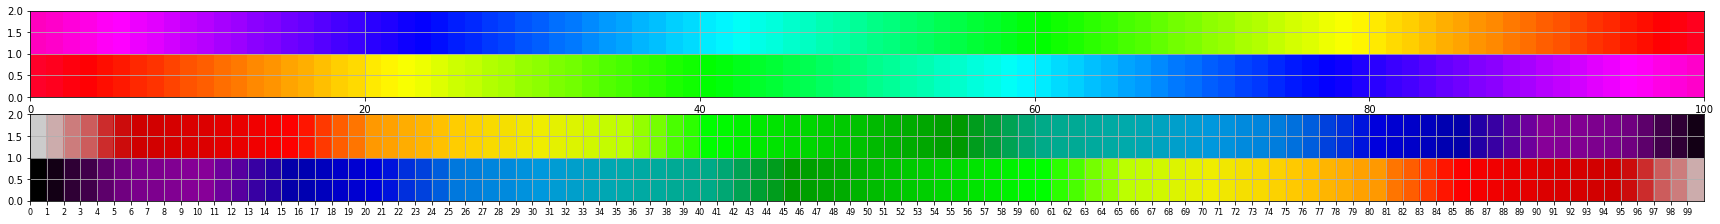

In [8]:
fig, axs = plt.subplots(2,1,figsize=(30,3.5))
axs[0].pcolor(colors_arr,vmin=0,vmax=1,cmap="gist_rainbow")
plt.xticks(np.arange(0,100,1),fontsize=8)
axs[0].grid()
axs[1].pcolor(colors_arr,vmin=0,vmax=1,cmap="nipy_spectral")
plt.xticks(np.arange(0,100,1),fontsize=8)
axs[1].grid()

plt.show()


## Plot basin masks..

_create_projection_axis: projection_type robin
_create_projection_axis: user_lon_0, user_lat_0 0 None
_create_projection_axis: parallels None
_create_projection_axis: lat_lim 50
Projection type:  robin
-179.0 179.0
-180.0 180.0
-89.0 89.0
-90.0 90.0
_create_projection_axis: projection_type robin
_create_projection_axis: user_lon_0, user_lat_0 0 None
_create_projection_axis: parallels None
_create_projection_axis: lat_lim 50
Projection type:  robin
-179.0 179.0
-180.0 180.0
-89.0 89.0
-90.0 90.0
_create_projection_axis: projection_type robin
_create_projection_axis: user_lon_0, user_lat_0 0 None
_create_projection_axis: parallels None
_create_projection_axis: lat_lim 50
Projection type:  robin
-179.0 179.0
-180.0 180.0
-89.0 89.0
-90.0 90.0


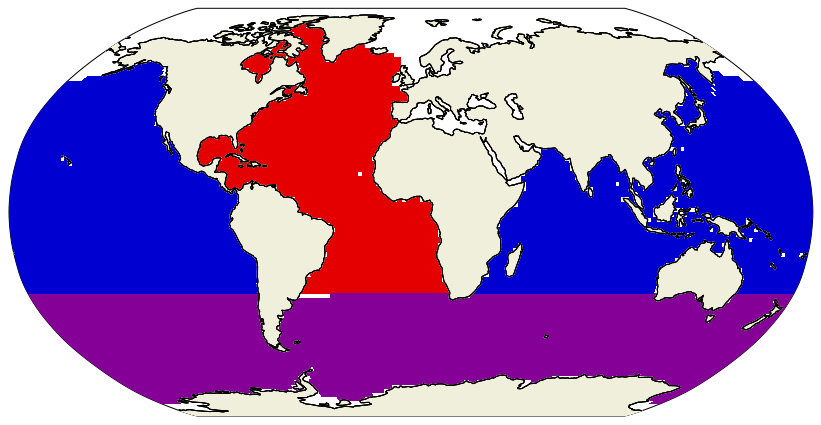

In [9]:



plt.figure(figsize=(12,6), dpi= 90)

ecco.plot_proj_to_latlon_grid(grid.XC, \
                              grid.YC, \
                              atl_nogin_basin_mask_C*0.89, \
                              plot_type = 'pcolormesh', \
                              dx=2,\
                              dy=2, \
                              cmin=0,\
                              cmax=1,\
                              cmap="nipy_spectral",\
                              projection_type = 'robin',\
                              less_output = False,
                              show_grid_lines = False);

ecco.plot_proj_to_latlon_grid(grid.XC, \
                              grid.YC, \
                              so_basin_mask_C*0.09, \
                              plot_type = 'pcolormesh', \
                              dx=2,\
                              dy=2, \
                              cmin=0,\
                              cmax=1,\
                              cmap="nipy_spectral",\
                              projection_type = 'robin',\
                              less_output = False,
                              show_grid_lines = False);

ecco.plot_proj_to_latlon_grid(grid.XC, \
                              grid.YC, \
                              indpac_basin_mask_C*0.19, \
                              plot_type = 'pcolormesh', \
                              dx=2,\
                              dy=2, \
                              cmap="nipy_spectral",\
                              cmin=0,\
                              cmax=1,\
                              projection_type = 'robin',\
                              less_output = False,
                              show_grid_lines = False);

## Plot change in isopycnal volume

In [10]:
SIGMA2 = xr.open_dataarray(f"Mixing_Diags/SIGMA2_full.nc")
SIGMA2_yearly = xr.open_dataarray(f"SIGMA2_yearly.nc")

In [11]:

sigma2_lvls = [1036.95,1037.053]

# Values for "tiles", "i_vals", and "j_vals" are 
tiles=np.arange(0,13)
i_vals=np.arange(0,90)
j_vals=np.arange(0,90)
time=np.arange(0,26)
# set dimensions based on input dataset with sigma-space vertical levels..
ntv_pdens_dims = (len(tiles),
                 len(sigma2_lvls),
                 len(j_vals),
                 len(i_vals),
                 )
new_coords = [tiles,sigma2_lvls,i_vals,j_vals]
new_dims = ["tile","sig","j","i",]

vol_sig_interp_out = xr.DataArray(data=np.zeros(ntv_pdens_dims),coords=new_coords,dims=new_dims)



ntv_pdens_dims_time = (len(tiles),
                         len(sigma2_lvls),
                         len(j_vals),
                         len(i_vals),
                         len(time)
                         )
new_coords_time = [tiles,sigma2_lvls,i_vals,j_vals,time]
new_dims_time = ["tile","sig","j","i","time"]

vol_sig_interp_out_time = xr.DataArray(data=np.zeros(ntv_pdens_dims_time),coords=new_coords_time,dims=new_dims_time)




In [12]:
SO_sig2_mask_highres = xr.open_dataarray("SO_sig2_mask.nc")

In [13]:
SO_sig2_mask_highres.sig[70:]

<xarray.DataArray 'sig' (sig: 59)>
array([1036.95 , 1036.955, 1036.96 , 1036.965, 1036.97 , 1036.975, 1036.98 ,
       1036.985, 1036.99 , 1036.995, 1037.   , 1037.005, 1037.01 , 1037.015,
       1037.02 , 1037.025, 1037.03 , 1037.035, 1037.04 , 1037.045, 1037.05 ,
       1037.055, 1037.06 , 1037.065, 1037.07 , 1037.075, 1037.08 , 1037.085,
       1037.09 , 1037.095, 1037.1  , 1037.105, 1037.11 , 1037.115, 1037.12 ,
       1037.125, 1037.13 , 1037.135, 1037.14 , 1037.145, 1037.15 , 1037.155,
       1037.16 , 1037.165, 1037.17 , 1037.175, 1037.18 , 1037.185, 1037.19 ,
       1037.195, 1037.2  , 1037.205, 1037.21 , 1037.215, 1037.22 , 1037.225,
       1037.23 , 1037.235, 1037.24 ])
Coordinates:
  * sig      (sig) float64 1.037e+03 1.037e+03 1.037e+03 ... 1.037e+03 1.037e+03
    k        int64 ...
    dep      float64 ...
    tim      datetime64[ns] ...
    time     int64 ...
    Z        float32 ...

In [14]:



SIGMA2vol_0_interp = calculate_isovol.sigma2_volume_simple_interp(sigma2_lvls,SIGMA2.isel(time=0),grid,vol_sig_interp_out.copy(),time=False,lessthan=True)

SIGMA2vol_1_interp = calculate_isovol.sigma2_volume_simple_interp(sigma2_lvls,SIGMA2.isel(time=-1),grid,vol_sig_interp_out.copy(),time=False,lessthan=True)


SIGMA2vol_yearly_interp = calculate_isovol.sigma2_volume_simple_interp(sigma2_lvls,SIGMA2_yearly,grid,vol_sig_interp_out_time.copy(),time=True,lessthan=True)



1036.95 1037.053 1036.95 1037.053 1036.95 1037.053 

<module 'matplotlib.pyplot' from '/Users/tatsumonkman/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

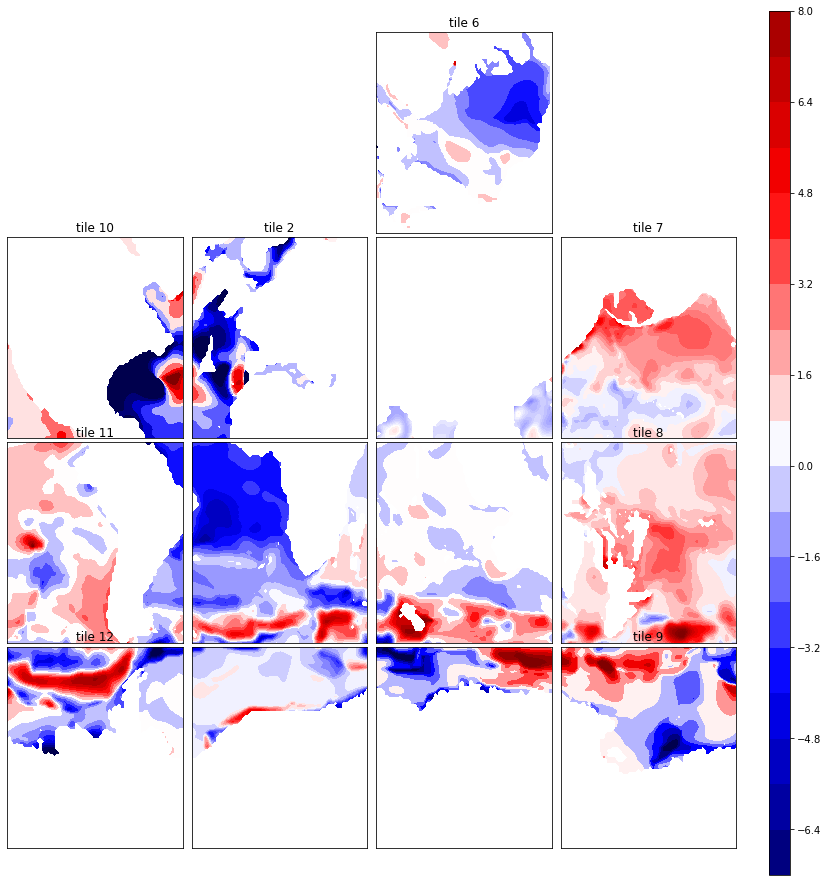

In [15]:
plotting_functions.world_plot((SIGMA2vol_1_interp.isel(sig=0)-SIGMA2vol_0_interp.isel(sig=0))/(grid.rA*26),cmap="seismic",cmin=-8,cmax=9)

_create_projection_axis: projection_type robin
_create_projection_axis: user_lon_0, user_lat_0 0 None
_create_projection_axis: parallels None
_create_projection_axis: lat_lim 50
Projection type:  robin
-179.0 179.0
-180.0 180.0
-89.0 89.0
-90.0 90.0


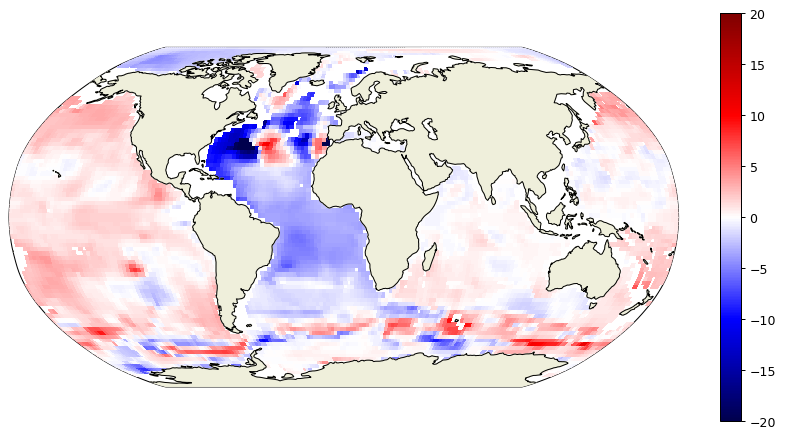

In [16]:
tmp_plt = (SIGMA2vol_1_interp.isel(sig=0)-SIGMA2vol_0_interp.isel(sig=0))/(grid.rA*26)

plt.figure(figsize=(12,6), dpi= 90)

ecco.plot_proj_to_latlon_grid(grid.XC, \
                              grid.YC, \
                              tmp_plt, \
                              plot_type = 'pcolormesh', \
                              dx=2,\
                              dy=2, \
                              cmap="seismic",\
                              cmin=-20,\
                              cmax=20,\
                              projection_type = 'robin',\
                              less_output = False,
                              show_grid_lines = False,
                             show_colorbar=True,);

_create_projection_axis: projection_type robin
_create_projection_axis: user_lon_0, user_lat_0 0 None
_create_projection_axis: parallels None
_create_projection_axis: lat_lim 50
Projection type:  robin
-179.0 179.0
-180.0 180.0
-89.0 89.0
-90.0 90.0


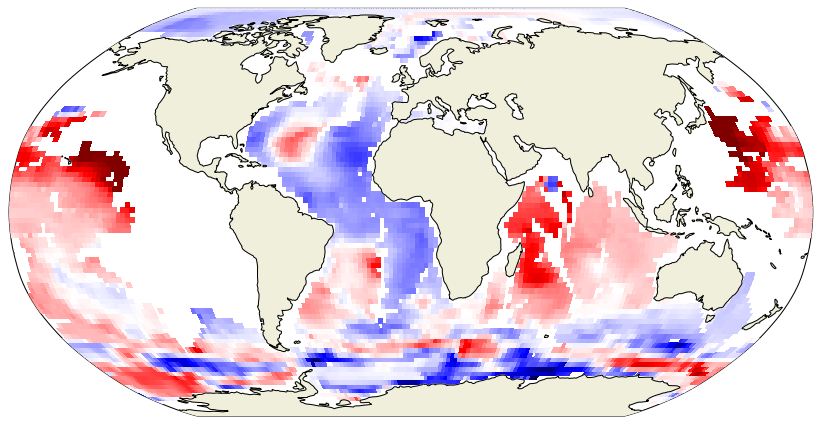

In [17]:
tmp_plt = (SIGMA2vol_1_interp.isel(sig=1)-SIGMA2vol_0_interp.isel(sig=1))/(grid.rA*26)

plt.figure(figsize=(12,6), dpi= 90)

ecco.plot_proj_to_latlon_grid(grid.XC, \
                              grid.YC, \
                              tmp_plt, \
                              plot_type = 'pcolormesh', \
                              dx=2,\
                              dy=2, \
                              cmap="seismic",\
                              cmin=-20,\
                              cmax=20,\
                              projection_type = 'robin',\
                              less_output = False,
                              show_grid_lines = False);
